<a href="https://colab.research.google.com/github/shreyanshtomar/moderation/blob/master/models/fastai_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    218      0  0:00:01  0:00:01 --:--:--   218
Updating fastai...
Done.


In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 43.9MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyanshtomar","key":"e573d8377370c57bf874be0ef0084247"}'}

In [0]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d omeret/nsfw-nsafe
!unzip nsfw-nsafe.zip

In [0]:
!kaggle datasets download -d omeret/nsfw-safe
!unzip nsfw-safe.zip

In [0]:
path = '/content/dataset'
tfms=get_transforms()

In [0]:
data = ImageDataBunch.from_folder(path,valid_pct=0.6, size=224, bs = 128)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (42754 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sfw,sfw,sfw,sfw,sfw
Path: /content/dataset;

Valid: LabelList (64129 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sfw,nsfw,nsfw,nsfw,nsfw
Path: /content/dataset;

Test: None

In [0]:
data.show_batch(rows=3, figsize = (8,8))

In [0]:
data.classes

['nsfw', 'sfw']

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.244304,0.209264,0.067115,0.932885,1:23:57
1,0.151306,0.133463,0.047701,0.952299,1:24:06
2,0.088550,0.101669,0.036910,0.963090,1:26:13


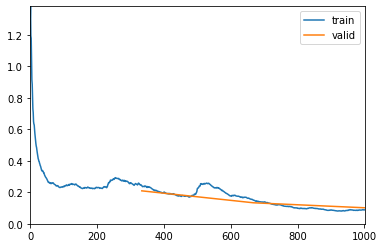

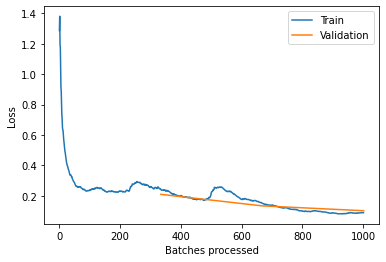

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-3,1e-1))
learn.recorder.plot_losses()

*More accuracy possible if I further try fine tuning the model by unfreezing the above layers and training all the layers on our dataset.*

In [0]:
learn.save('stage1-fastai18')